### Q. A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# Underlying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Converting the categorical columns into numeric columns using Label encoding
cols = ['ShelveLoc','Urban', 'US']

# Encode labels of above columns
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [5]:
# Statistics of the data
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [6]:
# Converting the sales column into categorical column based on the 50th percentile value (7.49)(below 50th perc- Low, above 50th prec- High)
sales_cat = []
for value in data['Sales']:
    if value >= 7.49:
        sales_cat.append('High')
    else:
        sales_cat.append('Low')
data['Sales_cat'] = sales_cat
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [7]:
# Deviding the data into input X
X = data.drop(['Sales','Sales_cat'], axis=1)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [8]:
# Deviding the data into output y
y = data['Sales_cat']
y.head()

0    High
1    High
2    High
3     Low
4     Low
Name: Sales_cat, dtype: object

In [9]:
#Unique values in result
y.unique()

array(['High', 'Low'], dtype=object)

In [10]:
#Count of output values
y.value_counts()

High    201
Low     199
Name: Sales_cat, dtype: int64

In [11]:
#Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 1)

### Building Decision Tree Classifier using Entropy Criteria 

In [12]:
#Building the model using entropy criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=1,max_depth=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

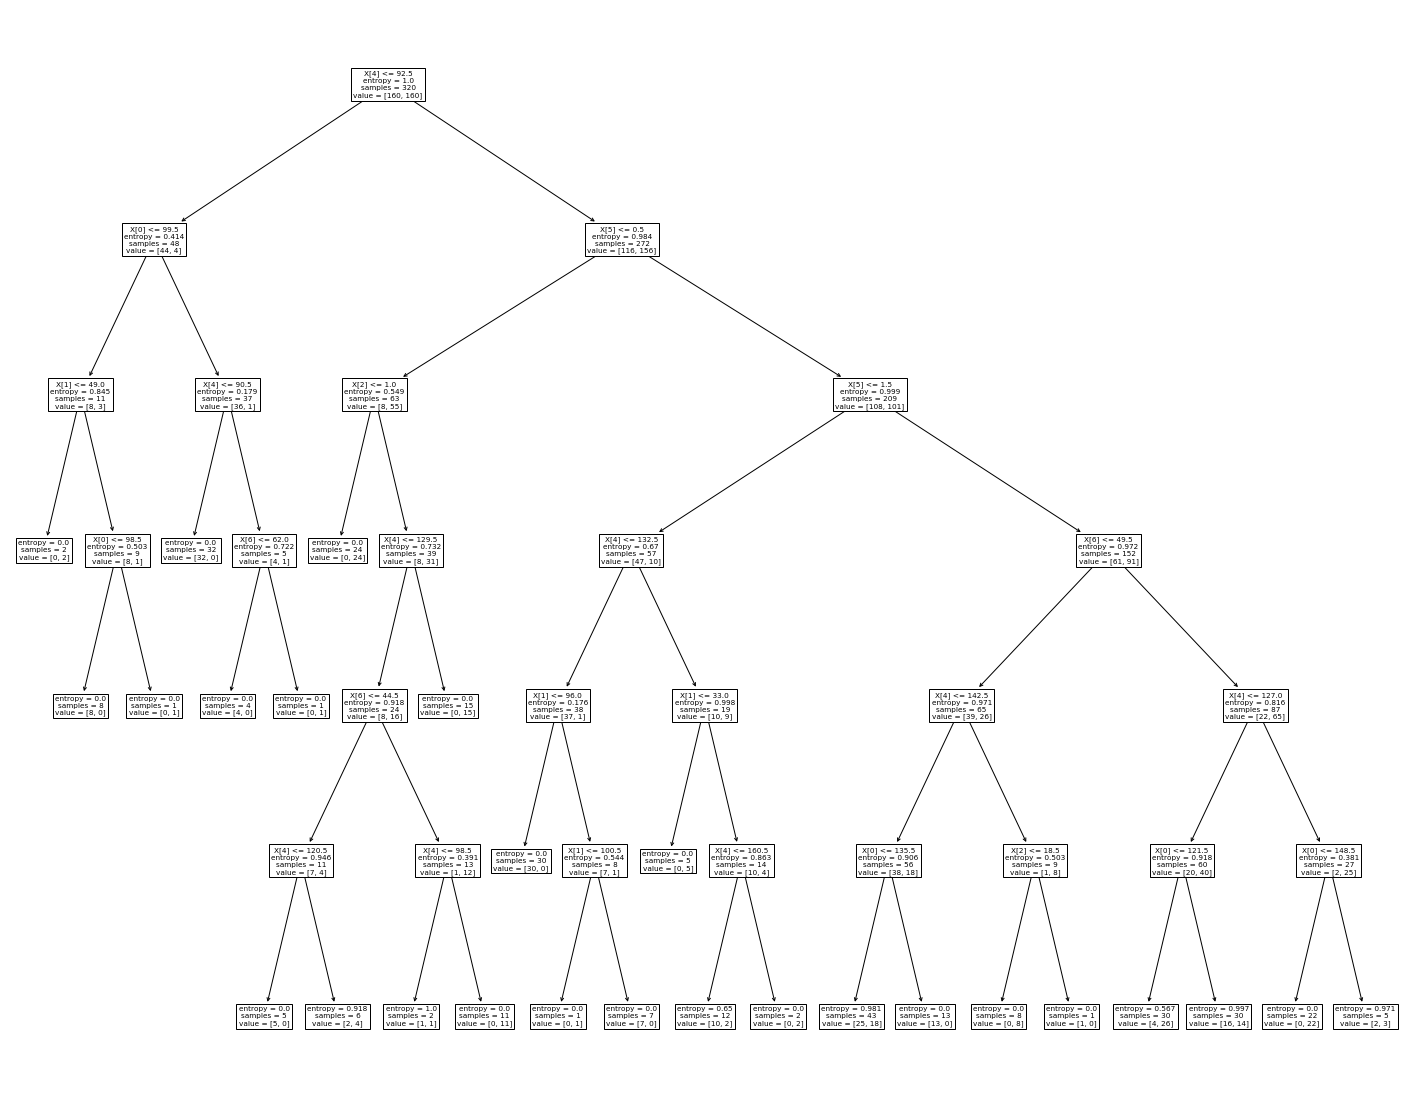

In [13]:
#Plotting the desicion tree
plt.figure(figsize=(25,20))
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree based on entropy')

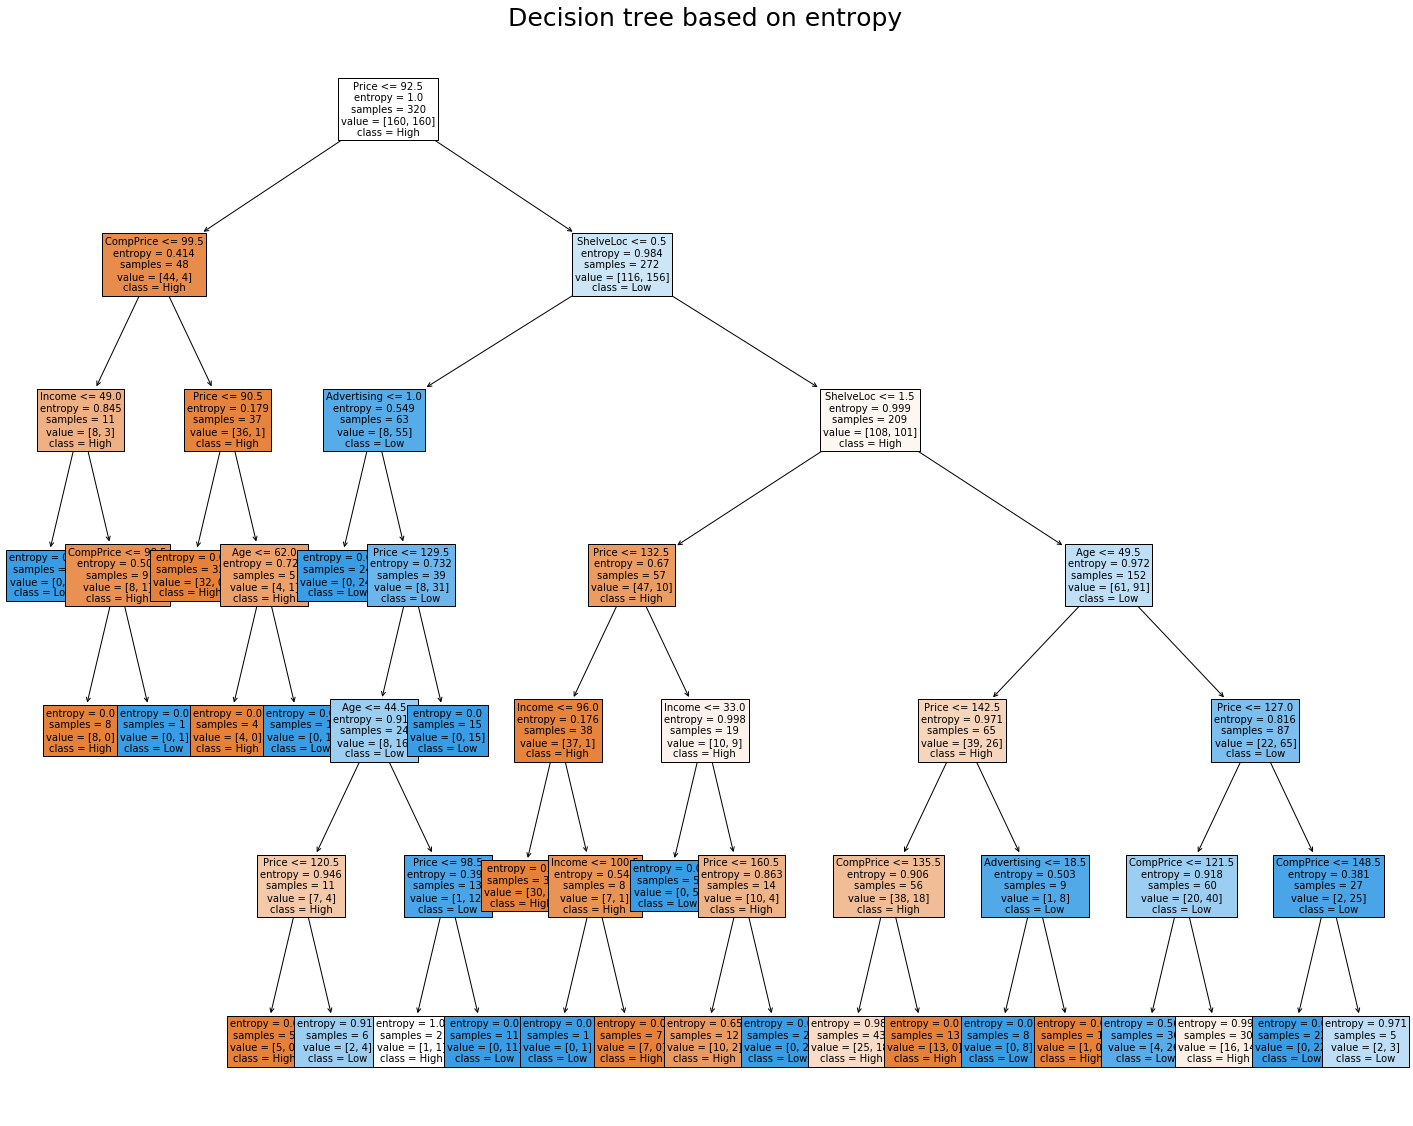

In [14]:
#Plotting the decision tree with meaningful information to improve the understandability
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], class_names=['High','Low'], fontsize=10,filled=True);
plt.title('Decision tree based on entropy', fontsize= 25)

In [15]:
#Predictions based on the trained model
pred = model.predict(X_test)
pd.Series(pred).value_counts()

High    43
Low     37
dtype: int64

In [16]:
# Cross validation
pd.crosstab(y_test,pred)

col_0,High,Low
Sales_cat,,
High,32,9
Low,11,28


In [17]:
#Accuracy
np.mean(pred == y_test)

0.75

In [18]:
#Features with importance based on above model
model.feature_importances_

array([0.14541708, 0.0869196 , 0.05016361, 0.        , 0.3804768 ,
       0.22422007, 0.11280284, 0.        , 0.        , 0.        ])

In [19]:
#Creating a series out of features score
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
F_entropy= pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
F_entropy

Price          0.380477
ShelveLoc      0.224220
CompPrice      0.145417
Age            0.112803
Income         0.086920
Advertising    0.050164
US             0.000000
Urban          0.000000
Education      0.000000
Population     0.000000
dtype: float64

#### Best features based on entropy bsed decision tree are price, ShelveLoc, CompPrice, Age

### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
# Buliding a model based on gini impurity criterion
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

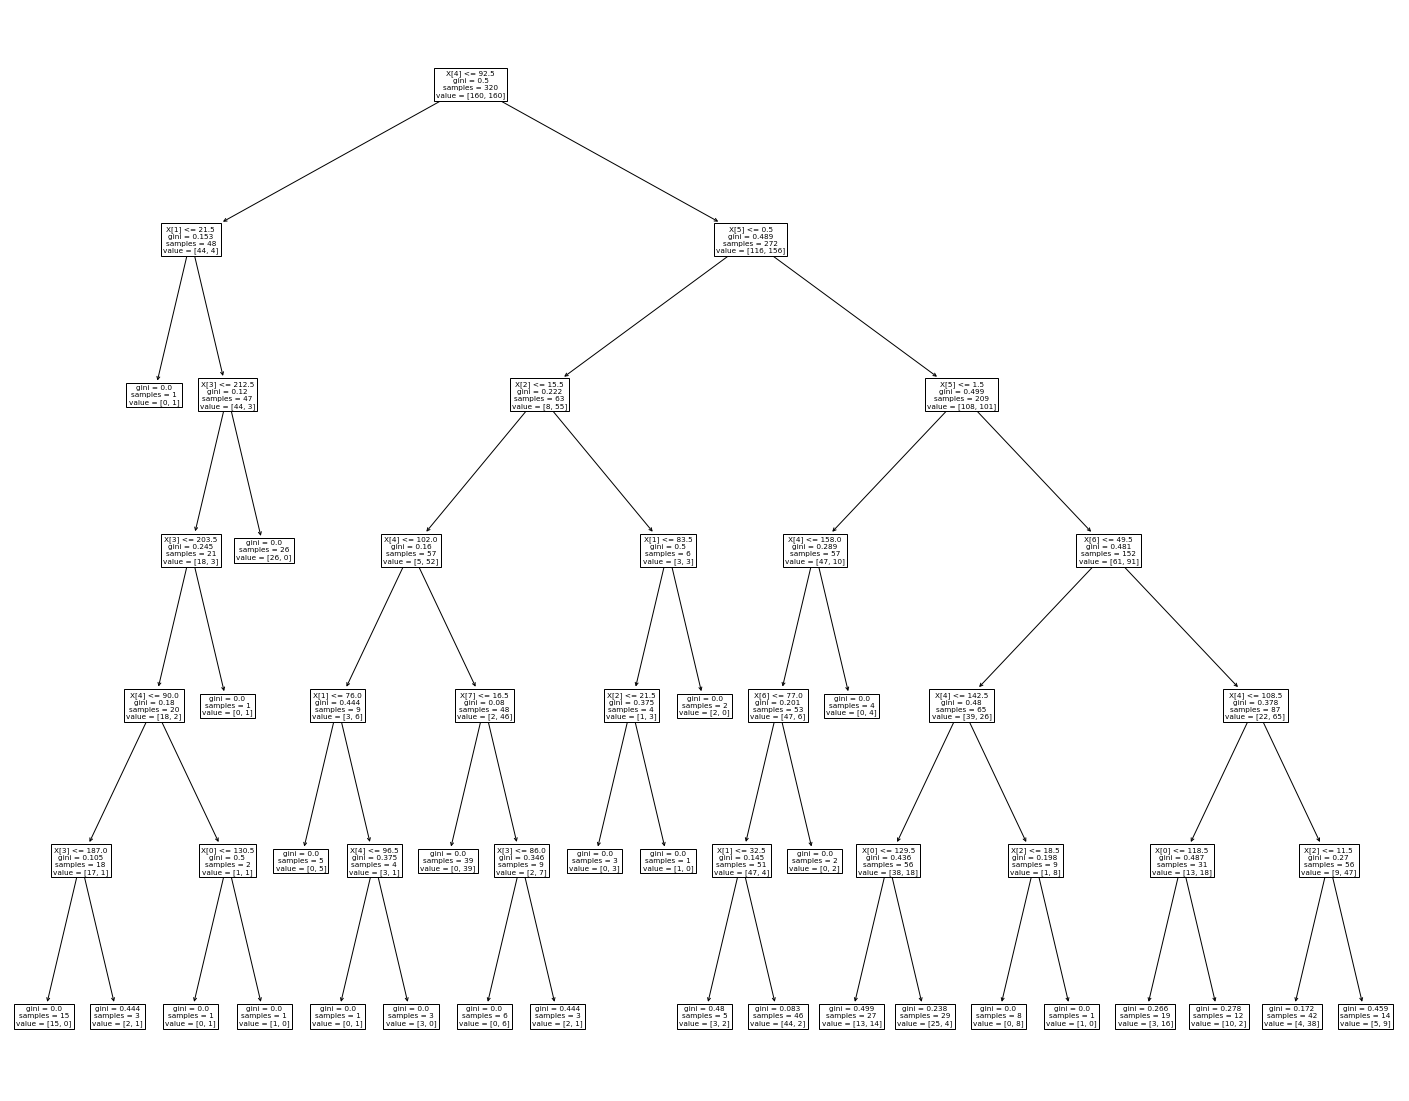

In [21]:
#Plotting the decision tree
plt.figure(figsize=(25,20))
tree.plot_tree(model_gini);

Text(0.5, 1.0, 'Decision tree based on gini impurity')

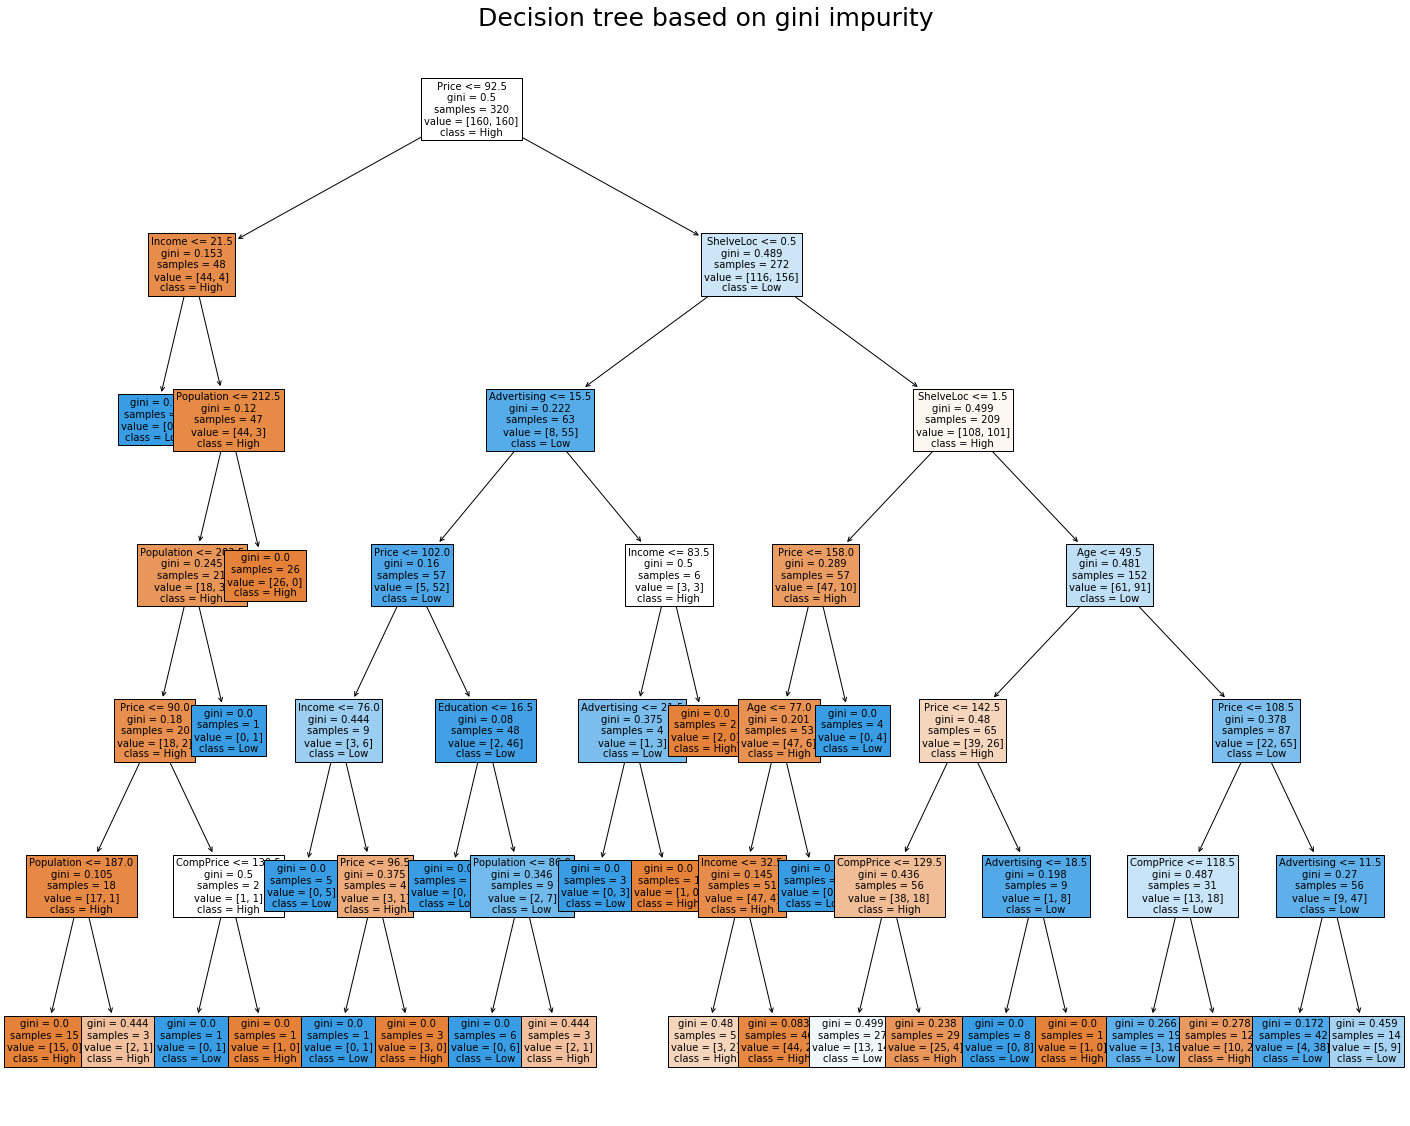

In [22]:
#Plotting the decision tree with meaningful information to improve the understandability
plt.figure(figsize=(25,20))
tree.plot_tree(model_gini,feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],class_names=['High','Low'],filled=True,fontsize=10)
plt.title('Decision tree based on gini impurity', fontsize= 25)

In [23]:
#Predicting based on the trained gini based model
pred_gini = model_gini.predict(X_test)
pd.Series(pred_gini).value_counts()

Low     42
High    38
dtype: int64

In [24]:
#Cross validation
pd.crosstab(pred_gini,y_test)

Sales_cat,High,Low
row_0,,
High,29,9
Low,12,30


In [25]:
#Accuracy
np.mean(pred_gini == y_test)

0.7375

In [26]:
#Best features based on gini model
model_gini.feature_importances_

array([0.10822338, 0.0631486 , 0.06039665, 0.04003029, 0.3369764 ,
       0.27199851, 0.11258056, 0.00664561, 0.        , 0.        ])

In [27]:
#Creating a series of features scores
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
F_gini= pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)
F_gini

Price          0.336976
ShelveLoc      0.271999
Age            0.112581
CompPrice      0.108223
Income         0.063149
Advertising    0.060397
Population     0.040030
Education      0.006646
US             0.000000
Urban          0.000000
dtype: float64

#### Based on gini criterion model, the best features are price, ShelveLoc, Age, CompPrice

In [29]:
#Combining the feature scores of 2 models into one series
columns = {'F_entropy': F_entropy, 'F_gini': F_gini}
pd.concat(columns, axis=1, sort = False) 

,F_entropy,F_gini
Price,0.380477,0.336976
ShelveLoc,0.224220,0.271999
CompPrice,0.145417,0.108223
Age,0.112803,0.112581
Income,0.086920,0.063149
Advertising,0.050164,0.060397
US,0.000000,0.000000
Urban,0.000000,0.000000
Education,0.000000,0.006646
Population,0.000000,0.040030


## Conclusion:

#### As per the above Decision trees based on the entropy and gini impurity, following are the key features to determine the sales:
- Price
- ShelveLoc
- CompPrice
- Age
